# 1 关联图correlation

## 1.7 边缘箱线图

横坐标：发动机排量(L)<br>
纵坐标：公路里程/加仑<br>
散点颜色：制造商

### 1.7.1 导入需要的绘图库

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft Yahei']
import seaborn as sns
%matplotlib inline

### 1.7.2 认识箱线图及绘制箱线图的函数

#### sns.boxplot()

x：需要绘制的箱线图的变量<br>
ax：需要绘制箱线图的子图<br>
orient：箱线图的方向，可选v或h<br>
meanline：是否显示均值线

In [2]:
X = np.random.randn(1000) #标准正态分布下的随机数

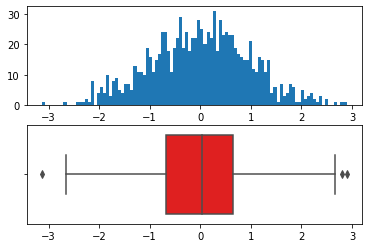

In [3]:
fig, (ax1, ax2) = plt.subplots(2) #2行子图
#直方图
ax1.hist(X, bins = 100)
#箱线图
sns.boxplot(x = X #变量
           ,ax = ax2 #选择子图
           ,orient = 'h' #方向
           ,color = 'red' #颜色
           ,meanline = True #显示均值线
           )

In [4]:
#严重偏态分布下的随机数，randint生成随机整数
X_ = np.random.randint(0,300,50).tolist() + np.random.randint(300,800,50).tolist() + np.random.randint(800,1000,900).tolist()

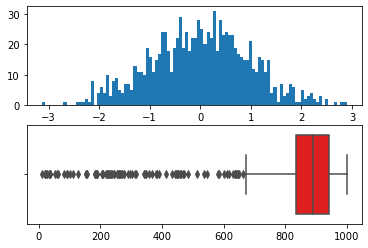

In [5]:
fig, (ax1, ax2) = plt.subplots(2) #2行子图
#直方图
ax1.hist(X, bins = 100)
#箱线图
sns.boxplot(x = X_ #变量
           ,ax = ax2 #选择子图
           ,orient = 'h' #方向
           ,color = 'red' #颜色
           ,meanline = True #显示均值线
           )

In [7]:
Q3, Q1 = np.percentile(X, [75, 25])
iqr = Q3 - Q1
iqr

1.344200021361356

In [8]:
max(X) #极端值，大于上四位数+1.5*分位距

2.8920203683498835

In [9]:
Q3 + 1.5*iqr

2.6729792326879034

In [10]:
min(X) #极端值，小于下四分位数-1.5*分位距

-3.126236499994672

In [11]:
Q1 - 1.5*iqr

-2.703820852757521

### 1.7.3 导入数据，绘制图像

In [13]:
df = pd.read_csv('http://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv')

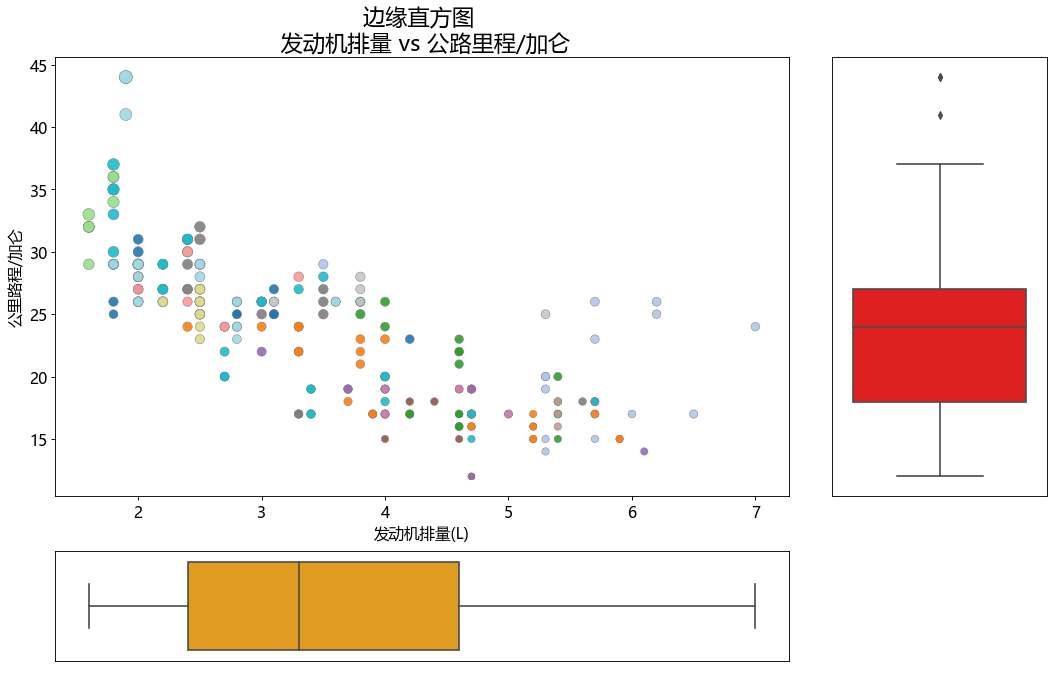

In [15]:
#分割画布
fig = plt.figure(figsize = (16,10), dpi = 80, facecolor = 'white')
grid = plt.GridSpec(4, 4, hspace = 0.5, wspace = 0.2)

#在分割完毕的画布上确认子图的位置
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels = [], yticklabels = [])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels = [], yticklabels = [])

#在中心绘制气泡图
ax_main.scatter('displ', 'hwy' #横纵坐标
               ,data = df
               ,s = df.cty*4 #气泡图
               ,c = df.manufacturer.astype('category').cat.codes #制造商的类别
               ,cmap = 'tab20' #可以根据自己喜欢的颜色随意修改
               ,edgecolors = 'gray'
               ,linewidths = 0.5
               ,alpha = 0.9)

#在右侧和下方绘制箱线图
sns.boxplot(x = df.hwy #纵坐标
           ,ax = ax_right #右图
           ,orient = 'v' #竖直
           ,color = 'red' #红色
           )
sns.boxplot(x = df.displ #横坐标
           ,ax = ax_bottom #下方
           ,orient = 'h' #水平
           ,color = 'orange' #橙色
           )

#装饰图像
##移除箱线图自带的坐标轴名称
ax_bottom.set(xlabel = '')
ax_right.set(ylabel = '')

##设置标题、横坐标和纵坐标
ax_main.set(title = '边缘直方图 \n 发动机排量 vs 公路里程/加仑' #主图标题
           ,xlabel = '发动机排量(L)' #主图横坐标轴名称
           ,ylabel = '公里路程/加仑' #主图纵坐标轴名称
           )
ax_main.title.set_fontsize(20) #标题字体大小

for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14) #对所有横坐标纵坐标上的标题和刻度都设置字体大小为14

for item in [ax_bottom, ax_right]:
    item.set_xticks([])
    item.set_yticks([]) #去掉两个直方图上的标尺，设为空